# Signaalitöötluse näiteid

<div style="float: left;">Valter Kiisk<br><span style="font-size: 75%;">TÜ Füüsika Instituut</span></div><div style="float: right;">Viimati muudetud: 21.01.2018</div>
<div style="display:none">
$\newcommand{\atan}{\mathop{\rm atan}\nolimits}$
$\newcommand{\arg}{\mathop{\rm arg}\nolimits}$
$\newcommand{\erf}{\mathop{\rm erf}\nolimits}$
</div>

In [1]:
import numpy as np
from numpy import linspace, arange, exp, sin, cos, log, sqrt, pi, fft, piecewise, convolve
from matplotlib.pyplot import *
from matplotlib import rcParams
rcParams['figure.dpi'] = 100
rcParams['lines.markeredgewidth'] = 0
rcParams['lines.markersize'] = 5
rcParams['font.size'] = 12
rcParams['axes.prop_cycle'] = cycler('color', 'bgr')
rcParams['mathtext.fontset'] = 'cm'

Signaalitöötluse näidetena vaatleme kahte operatsiooni: kahe signaali konvolueerimist ja Fourier' pöörde arvutamist.

Olgu meil mingit laadi seade või süsteem, mille jaoks omavad tähendust mõisted *sisendsignaal* ja *väljundsignaal*. See võiks olla näiteks mingit laadi valguse detektor, kus sisendiks on valgussignaal ja väljundiks elektrisignaal. Igasuguse reaalse süsteemi reaktsioonikiirus on lõplik, st see ei suuda reprodutseerida oma väljundis kuitahes kiireid muutuseid, mis toimuvad sisendis. Näiteks, kui mainitud valgusdetektorit stimuleerida lõpmata lühikese valgusimpulsiga, siis väljundsignaal saavutab teatava minimaalse, aga siiski nullist erineva kestuse. Seda väljundsignaali $h(t)$ nimetatakse süsteemi *impulsskosteks*. Kui nüüd sedasama süsteemi stimuleerida lõpliku valgusimpulsiga $x(t)$, siis väljundsignaal saab olema $h(t)$ ja $x(t)$ sidum ehk konvolutsioon:$$y(t)=\int_{-\infty}^\infty x(t')u(t-t') dt',$$ seda siis eeldusel, et süsteem on [lineaarne ja nihkeinvariantne](https://en.wikipedia.org/wiki/LTI_system_theory).

Oletagem, et süsteemi impulsskostet kirjeldab teatud kestusega Gaussi kelluke. Sellele süsteemile suuname hästi konkreetse kujuga sisendsignaali (nt kastsignaali), et oleks hästi näha koste efekt. Erinevalt äsjasest valemist arvutis on igasugused signaalitöötlusoperatsioonid paratamatult diskreetsed, st signaalid on lõpliku sammuga ja lõpliku kestusega. Selle rõhutamiseks teeme esimese näite võrdlemisi vähese arvu andmepunktidega. Et vältida ääre-efekte, peavad andmevektorid olema siiski parajalt pikad, et signaal jõuaks minna praktiliselt nulli.

Kuna selle näite jaoks tuleb teha hulk väga sarnaseid graafikuid, siis vormistame vastava algoritmi alamprogrammina. Ühtlasi toome siin sisse uue graafikutüübi, kasutades tavapärase `plot` asemel funktsiooni `stem`.

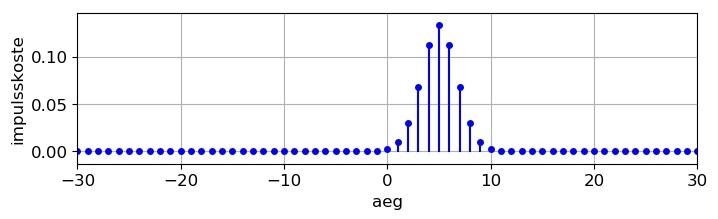

In [2]:
# ajavektor, üks ja sama kõigi järgnevate signaalide jaoks
t = arange(-30, 31)

# graafiku tegemise kood, 's' on signaalivektor
def graafik(s, nimi):
    m = s.max()
    figure( figsize=(8, 2) )
    markerline, stemlines, baseline = stem(t, s)
    setp(baseline, visible=False)
    xlim(-30, 30)
    ylim(-0.1 * m, 1.1 * m)
    xlabel('aeg')
    ylabel(nimi)
    grid()
    show()

tau = 3. # süsteemi karakteerne reaktsiooniaeg
h = 1/sqrt(2*pi)/tau*exp(-(t-5.)**2/(2*tau)) # impulsskoste vektor
graafik(h, 'impulsskoste')

Kastsignaal (nagu ka saehammas jms) on vaid *tükati pidev* funktsioon. Seda saaks kergesti esitada tingimuslause abil, kuid NumPy kasutamiseks peavad kõik funktsioonid olema vektoriseeritud, st andma tulemuse ka siis, kui sisendiks on arvumassiiv. Üks lihtne viis seda realiseerida on funktsiooniga `numpy.piecewise`. Kastfunktsioonist veelgi standardsem tükati pidev funktsioon on Heaviside'i ühikaste $$\theta(t)=\begin{cases}1\text{, kui }t\geq0\\0\text{, kui }t<0\end{cases}.$$ Suvaline kastfunktsioon avaldub ilmselt kui kahe omavahel nihkes oleva ühikastme vahe.

Viimaks kahe signaalivektori sidumi saame funktsiooniga `numpy.convolve`. Põhimõtteliselt viimane arvutab sidumivektori valemiga$$y_n=\sum_m x_m h_{n-m}.$$ Et seda seostada eespool toodud valemiga, tuleks ette kujutada, et ajahetk $t=0$ asub andmevektori keskel. Lahtiseks jääb aga küsimus, milline valida indeksite $m$ ja $n$ vahemikud selles summas, sest andmevektorid on lõpliku pikkusega. On kolm ilmset varianti:

* kasutada täiel määral kõiki $x$ ja $h$ väärtuseid ja mittekattuvates osades võtta signaali väärtuseks 0 (`mode='full'`)
* kasutada viimasest vaid sellist osa, mis vastab samale ajadiapasoonile nagu lähteandmetes (`mode='same'`)
* kasutada ainult $x$ ja $h$ täielikult kattuvat osa (`mode='valid'`)

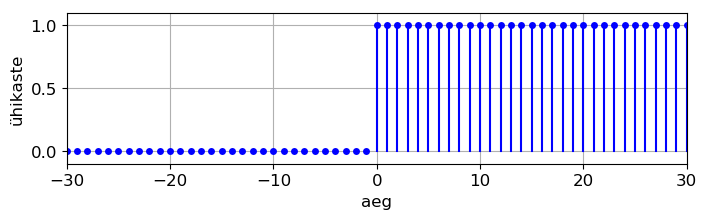

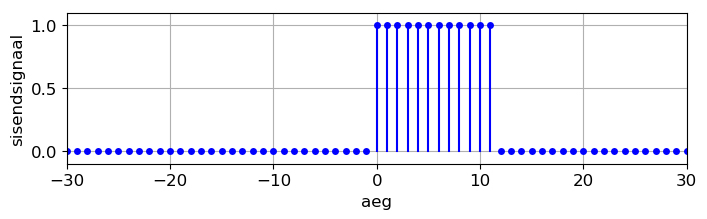

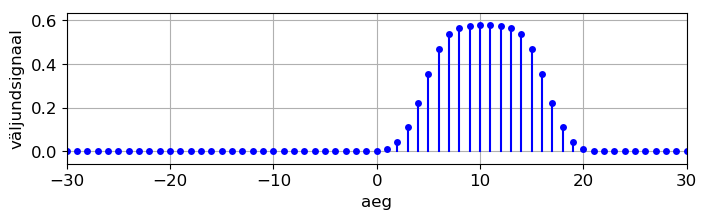

In [3]:
theta = lambda x: piecewise(x, [x < 0, x >= 0], [0, 1])
graafik(theta(t), 'ühikaste')

w = 12 # kastsignaali kestus
x = theta(t) - theta(t-w)
graafik(x, 'sisendsignaal')

y = convolve(h, x, mode='same')
graafik(y, 'väljundsignaal')

*Fourier' analüüsi* kontseptsioon tuleneb asjaolust, et mistahes piisavalt regulaarne funktsioon $f(t)$ on esitatav teatud hulga harmooniliste komponentide (st siinusfunktsioonide) summana. Kui funktsiooni asemel anda vastavate harmooniliste komponentide amplituudid ja algfaasid, siis öeldakse, et tegemist on funktsiooni esitusega sagedusruumis. Mida järsem on funktsiooni käik, seda rohkem või tihedamalt on harmoonilisi komponente tarvis selle funktsiooni reprodutseerimiseks.

Kui harmoonilise komponendi amplituud ja faas võtta kokku ühte kompleksarvu, siis Fourier' pööret kirjeldab funktsioon $F(\omega)$, mis on üldjuhul kompleksse väärtusega pidev jaotus sagedusvahemikus $-\infty\ldots\infty$. Fourier' teisendus ja pöördteisendus on peaaegu identsed ja nende defineerimisel tuleb aluseks võtta järgmine võrdus:
$$f(t)=\frac{1}{2\pi}\int_{-\infty}^\infty d\omega e^{i\omega t} \int_{-\infty}^\infty dt' f(t')e^{-i\omega t'},$$ kus $\omega$ on ringsagedus ($\omega = 2\pi\nu$). Siin on teatud vabadus nii eksponendi märgi valikul kui ka kordaja $1/2\pi$ paigutamises.

Arvutis on signaal antud mitte pideva funktsioonina, vaid diskreetse andmevektorina. Diskreetse Fourier' pöörde kiireks arvutamiseks on [spetsiaalsed algoritmid](https://en.wikipedia.org/wiki/Fast_Fourier_transform) (*fast Fourier transform* ehk FFT). Pythonis on FFT algoritmid moodulis `numpy.fft`. Näiteks funktsiooni `rfft` saab kasutada juhul kui signaali väärtused on reaalsed. Näidisena võtame [amplituudmoduleeritud laine](https://en.wikipedia.org/wiki/Amplitude_modulation) (selline on näiteks AM-sagedusala raadiosignaal), kus teatud sagedusega ($\nu_\text{kande}$) kandelaine amplituud on omakorda moduleeritud sagedusega $\nu_\text{modul}$:
$$f(t)=\sin(2\pi\nu_\text{kande}t)\left[1+0.5\sin(2\pi\nu_\text{modul}t)\right].$$ On hästi teada, et sellise signaali sagedusspekter sisaldab lisaks kandesagedusele veel komponente $\nu_\text{kande}\pm \nu_\text{modul}$, mis tulevad teravate piikidena välja ka Fourier' spektris:

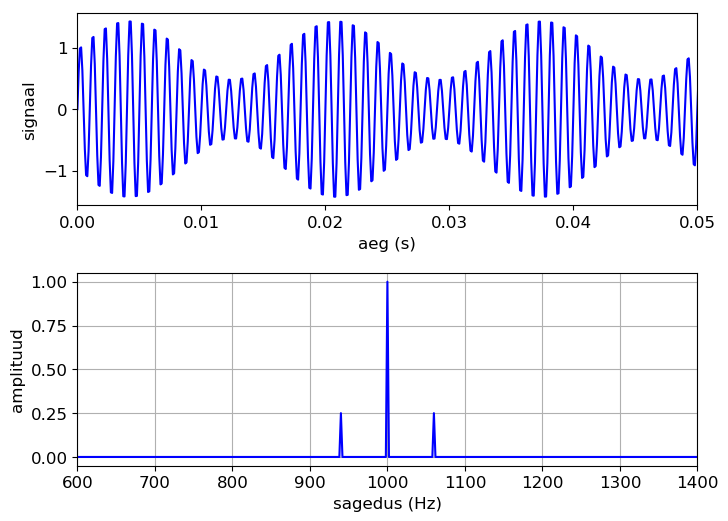

In [12]:
# AM-signaali arvutus
n = 5000 # signaali lugemite koguarv
nu_kande = 1000. # kandesagedus [Hz]
nu_modul = 60. # modulatsioonisagedus [Hz]
nu_samp = 10 * nu_kande # samplimissagedus [Hz]
delta_t = 1 / nu_samp # ajasamm [s]
t = arange(n) * delta_t # kogu ajavektor
# funktsiooni f(t) väärtused
f = sin(2 * pi * nu_kande * t) * (1 + 0.5 * sin(2 * pi * nu_modul * t))

# selle graafik
figure( figsize=(8, 6) )
subplot(211)
plot(t, f, 'b-')
xlim(0, 3 / nu_modul) # kuvame vaid 3 modulatsiooniperioodi 
grid()
xlabel('aeg (s)')
ylabel('signaal')
grid()

# Fourier komponentide amplituudid ja sagedused
F = abs(fft.rfft(f)) * 2 / n
nu = arange(len(F)) * ( nu_samp / n )

# selle graafik
subplot(212)
plot(nu, F, 'b-')
xlim(600, 1400)
xlabel('sagedus (Hz)')
ylabel('amplituud')
grid()
subplots_adjust(hspace=0.35)
show()